In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import techniques

In [2]:
boston_house = pd.read_csv("boston.csv")
boston_house

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = boston_house.loc[:,column_sels]
y = boston_house['MEDV']
x = pd.DataFrame(data=scaler.fit_transform(x), columns=column_sels)

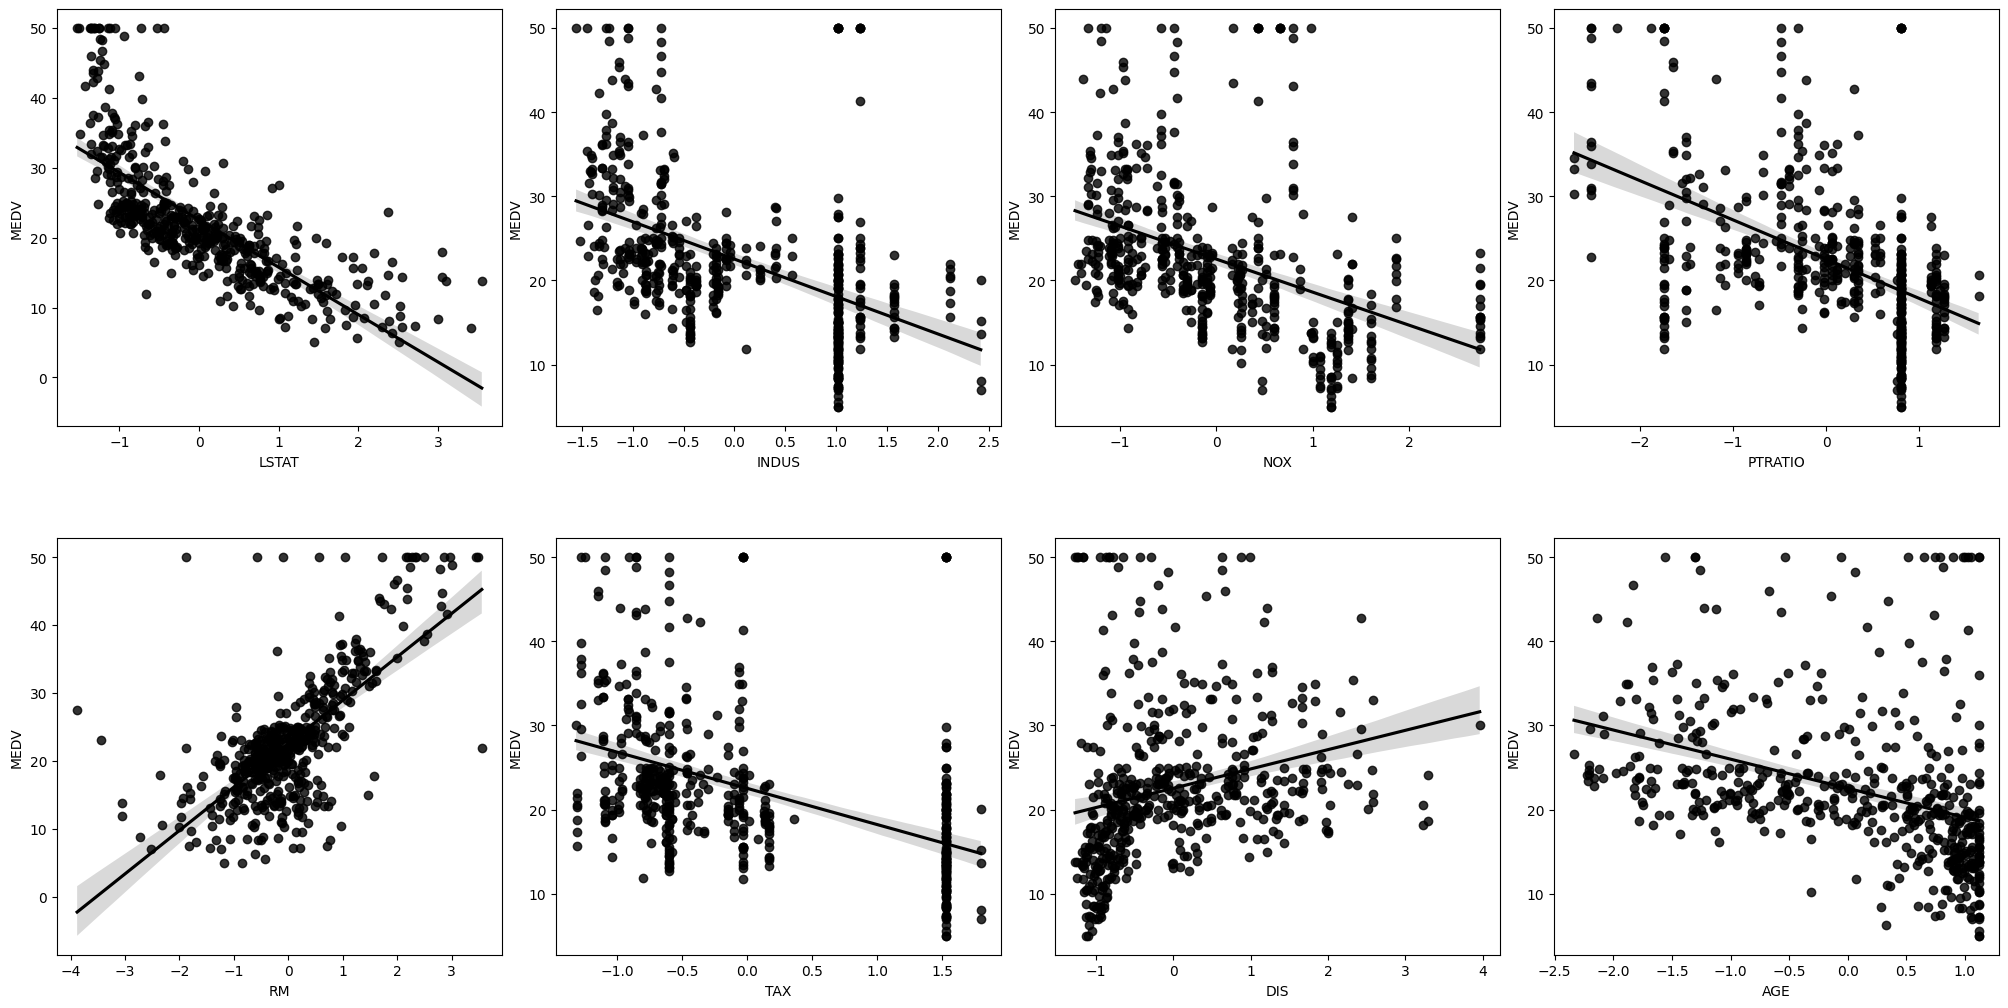

In [4]:
xfig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y = y, x = x[k], ax = axs[i], color = 'black')
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

In [5]:
p_n = 100
keep_val = np.arange(start = 0.01, stop = 0.99, step = 0.01)
best_keep, lowest_MSE, arr_ret = techniques.grid_searchCV_pruning(xin = np.array(x), yin = np.array(y), p = p_n, keep_rate = keep_val, CV_groups = 20, classification = False)

The model with lowest MSE is : 83.64816290502776
The model parameters with lowest MSE is using keep_rate : 0.9


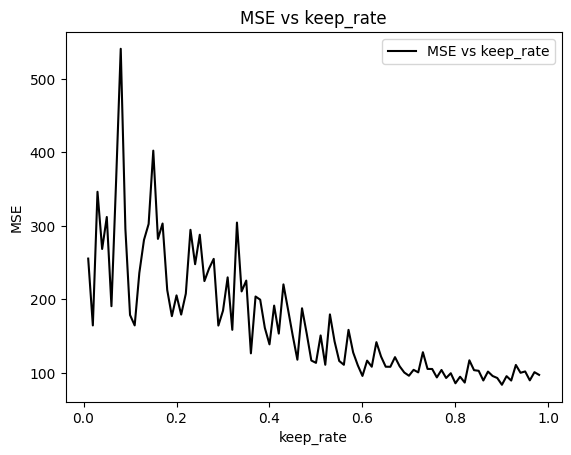

In [6]:
x_plot = np.arange(start = 0.01, stop = keep_val[keep_val.shape[0] -1] + 0.01, step = 0.01)
plt.plot(x_plot, arr_ret, color = 'black', label = 'MSE vs keep_rate')
plt.title('MSE vs keep_rate')
plt.xlabel('keep_rate')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [7]:
ret = techniques.train_ELM_PRUNING(xin = np.array(x), yin = np.array(y), p = p_n, control = True, keep_rate = best_keep)
best_w = ret[0]
best_h = ret[1]
best_z = ret[2]

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(x), np.array(y), random_state = 0, train_size = 0.8)

In [9]:
y_pred = techniques.test_ELM(xin = X_test, Z = best_z, W = best_w, control = True, classification = False).reshape(-1,)

In [10]:
np.array(y_test).shape, y_pred.shape

((102,), (102,))

In [11]:
print(f"{np.array(y_test)}")

[22.6 50.  23.   8.3 21.2 19.9 20.6 18.7 16.1 18.6  8.8 17.2 14.9 10.5
 50.  29.  23.  33.3 29.4 21.  23.8 19.1 20.4 29.1 19.3 23.1 19.6 19.4
 38.7 18.7 14.6 20.  20.5 20.1 23.6 16.8  5.6 50.  14.5 13.3 23.9 20.
 19.8 13.8 16.5 21.6 20.3 17.  11.8 27.5 15.6 23.1 24.3 42.8 15.6 21.7
 17.1 17.2 15.  21.7 18.6 21.  33.1 31.5 20.1 29.8 15.2 15.  27.5 22.6
 20.  21.4 23.5 31.2 23.7  7.4 48.3 24.4 22.6 18.3 23.3 17.1 27.9 44.8
 50.  23.  21.4 10.2 23.3 23.2 18.9 13.4 21.9 24.8 11.9 24.3 13.8 24.7
 14.1 18.7 28.1 19.8]


In [12]:
print(f"{y_pred}")

[18.22655443 25.1100325  14.58172997 17.80617834 16.31421296 17.67867885
 20.45505963 16.17009407 20.28865058 16.86492687 16.18054339 17.0176016
 17.05634084 16.54087179 22.79166851 18.72345147 18.05886186 17.43222072
 20.5296261  17.57388682 16.2676566  13.49357522 18.79425733 18.89968882
 15.84492136 20.32908164 16.0306452  15.47055886 20.28727698 14.97806962
 17.19249216 19.73870133 11.45793864 11.02299757 14.22377926 19.95690148
 15.97195859 26.04813396 18.13348963 16.29265549 15.11687579 17.41602709
 14.13193994 17.73923955 11.44428803 12.12359474 11.45032591 16.19143935
 14.97573389 16.9864569  15.73245714 22.74523204 14.55660713 25.39662318
 17.18149813 14.23065647 14.03542499 13.79280465 23.47169537 15.60741194
 13.07124713 16.93479742 20.90726828 21.84288857 20.00541239 16.05505452
 16.50509321 13.68231893 17.75558218 20.0803609  13.13749261 16.03618194
 15.12432852 17.89742277 18.20678331 17.80151489 23.46665338 16.52505702
 16.76371523 18.11633371 14.75842237 18.32267284 22.